# <center><b> <em> Data Preprocessing </em> </b></center>

### <font color="green"> | - Import des Biblio et Dataframe</font>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the XLSX file
df_2010= pd.read_excel("../data/bronze.xlsx", sheet_name="Year 2009-2010")

In [5]:
# Read the XLSX file
df_2011= pd.read_excel("../data/bronze.xlsx", sheet_name="Year 2010-2011")

In [6]:
dfs = [df_2010, df_2011]

In [7]:
df = pd.concat(dfs)

In [8]:
df.head(9)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom


In [9]:
df.shape

(1067371, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


### Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

- Description: Product (item) name. Nominal.

- Quantity: The quantities of each product (item) per transaction. Numeric.

- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

- Country: Country name. Nominal. The name of the country where a customer resides.

### <font color="green"> || - Renaming Columns </font>

In [11]:
df.rename(index = str, \
              columns = {'Invoice' : 'invoice', \
                         'StockCode' : 'stock_code', \
                         'Quantity' : 'quantity', \
                         'InvoiceDate' : 'invoice_date', \
                         'Price' : 'unit_price', \
                         'Country' : 'country', \
                         'Description' : 'description', \
                         'Customer ID' : 'customer_id'}, inplace = True)
df

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### <font color="green"> || - Missing Data </font>

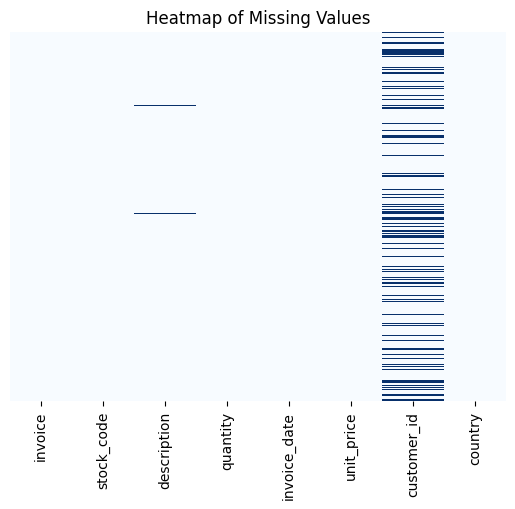

In [12]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(df.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [13]:
df.isnull().sum()

invoice              0
stock_code           0
description       4382
quantity             0
invoice_date         0
unit_price           0
customer_id     243007
country              0
dtype: int64

In [14]:
# Supprimer les lignes contenant des valeurs NaN
df = df.dropna()

In [15]:
df.isnull().sum()

invoice         0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [16]:
df.shape

(824364, 8)

### <font color="green"> ||| - Duplicated Data </font>

In [17]:
df.duplicated().sum()

26479

In [18]:
df[df.duplicated()==True]

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(797885, 8)

### <font color="green"> |V - Outliers </font>

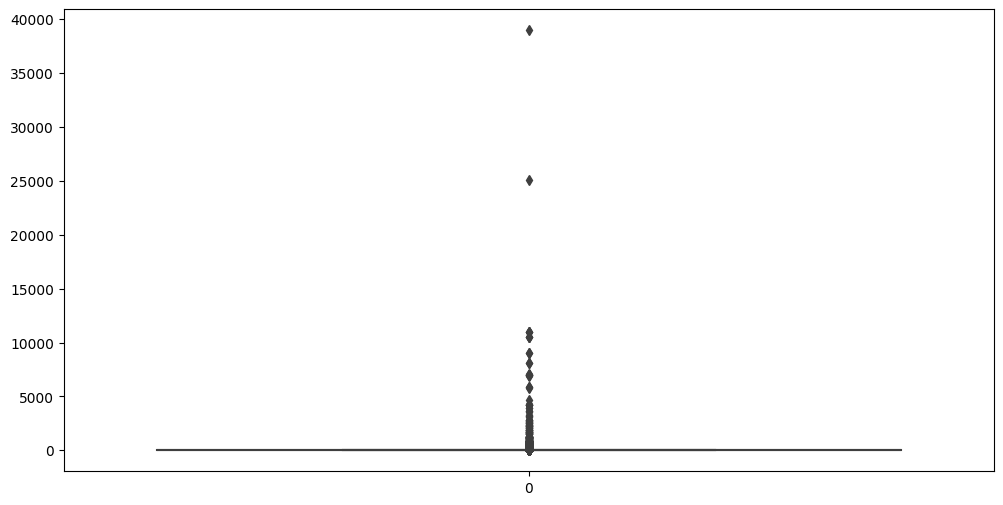

In [22]:
# Plot a boxplot for unit_price to see if there are any outliers. If there are, remove those instances:
plt.subplots(figsize = (12, 6))
up = sns.boxplot(df.unit_price)

### <font color="green"> V - Export Gold Data </font>

In [21]:
#EXporter la data dans un Csv 
df.to_csv('../data/gold.csv', index=False)